In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import math


In [49]:
df=pd.read_csv('greenbuildings.csv')
df[:10]

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
5,94765,1,231633,2.22,43.16,92.74,14,20,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
6,236739,6,210038,4.01,12.50,94.33,11,38,0,0,...,1,0,1,2746,1670,4416,25.55,0.010100,0.028900,17.50
7,234578,6,225895,4.01,14.77,91.02,15,24,0,1,...,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50
8,42087,6,912011,4.01,17.00,99.32,31,34,0,1,...,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50
9,233989,6,518578,4.01,17.00,93.54,21,36,1,1,...,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50


In [50]:
print("Green rated low occupancy properties:",len(df[(df['leasing_rate'] < 10) & (df['green_rating']==1)]))
print("Non green rated low occupancy properties:",len(df[(df['leasing_rate'] < 10) & (df['green_rating']==0)]))

Green rated low occupancy properties: 1
Non green rated low occupancy properties: 214


Here we can see that the number of properties that have low occupancy is higher for non green rated apartments than the green rated ones. Since we don't know the exact reason the properies have low occupancy it doesn't make sense for us to remove it from consideration.

In [53]:
print("The median rent for green-rated properties after removing low occupancy units:",df[(df['leasing_rate'] > 10) & (df['green_rating']==1)]['Rent'].median())
print("The median rent for non green-rated properties after removing low occupancy units:",df[(df['leasing_rate'] > 10) & (df['green_rating']==0)]['Rent'].median(),"\n")

print("The median rent for green-rated properties before removing low occupancy units:",df[df['green_rating']==1]['Rent'].median())
print("The median rent for non green-rated properties after removing low occupancy units:",df[df['green_rating']==0]['Rent'].median(),"\n")


The median rent for green-rated properties after removing low occupancy units: 27.6
The median rent for non green-rated properties after removing low occupancy units: 25.03 

The median rent for green-rated properties before removing low occupancy units: 27.6
The median rent for non green-rated properties after removing low occupancy units: 25.0 



However, here we can see that the median value of the properties before and after removing the low occupancy houses is approximately the same. However we should check the distribution of the leasing rates before aribitrarily removing low occupancy properties from the dataset.

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


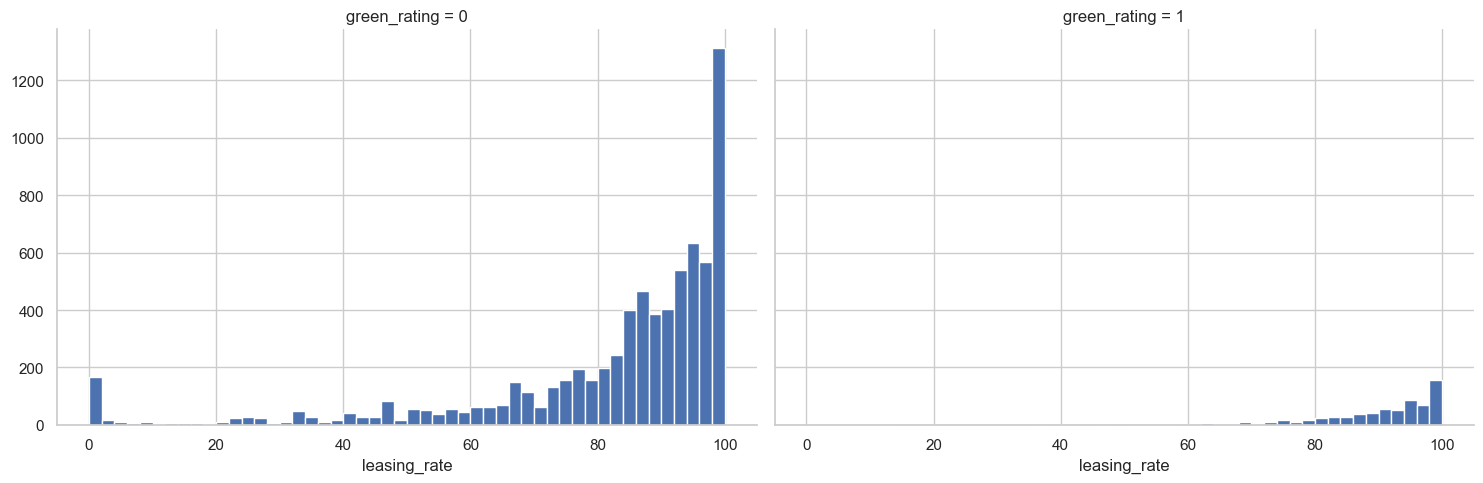

In [54]:
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col='green_rating', col_wrap=2, height=5, aspect=1.5)
g.map(plt.hist, 'leasing_rate', bins=50)  # You can adjust the number of bins as per your preference
plt.show()

We can see that the the green rated buildings mostly have high occupancy rates. There are practically no green buildings with 0 occupancy rates

However this correlation may not just be because people have a blanket preference for green buildings. It could be because green buildings are a relatively new concept, so most of the green buildings would be new and new buildings attract customers. We can test this hypothesis by plotting leasing rate vs age

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

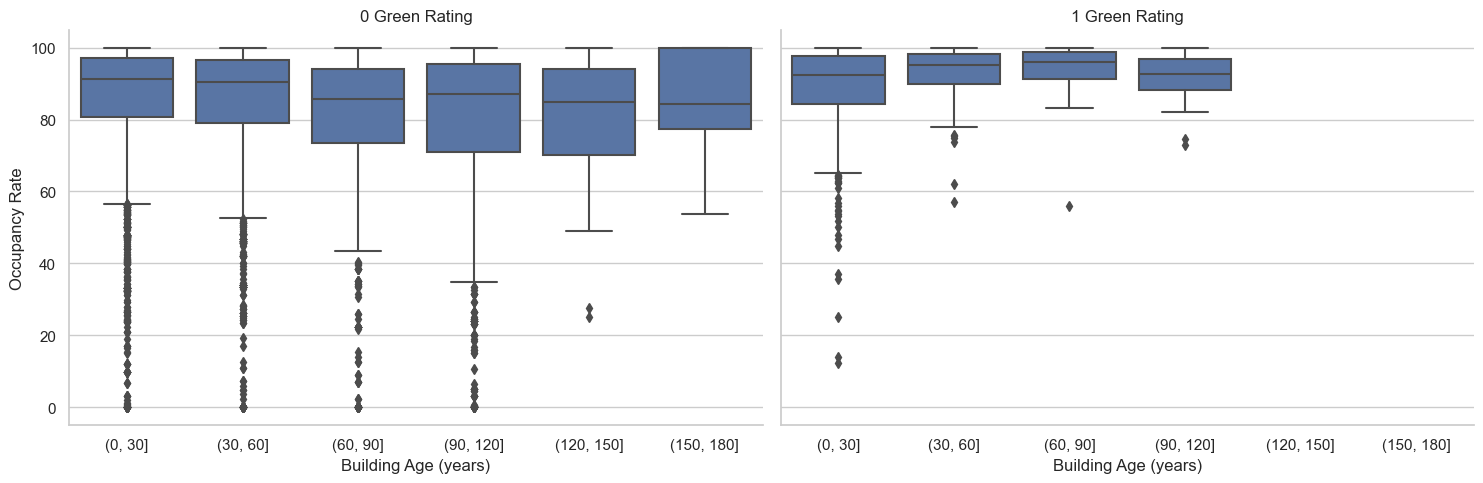

In [25]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
df['age_bin'] = pd.cut(df['age'], bins=range(0, df['age'].max() + 10, 30))
g = sns.FacetGrid(data=df, col="green_rating", margin_titles=True,height=5, aspect=1.5)
g.map_dataframe(sns.boxplot, x="age_bin", y="leasing_rate")
g.set_axis_labels("Building Age (years)", "Occupancy Rate")
g.set_titles(col_template="{col_name} Green Rating")
plt.show()

Here we can see that the oldest green-buildings are in the range (90,120) and nothing older than that. But of the older buildings that are present in both green and non-green categories we can see that occupancy is higher for green buildings that are (60-120)years old

This means that the age of the building will have little impact on green-rated buildings so the owner will be able to procure rent over the years.

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


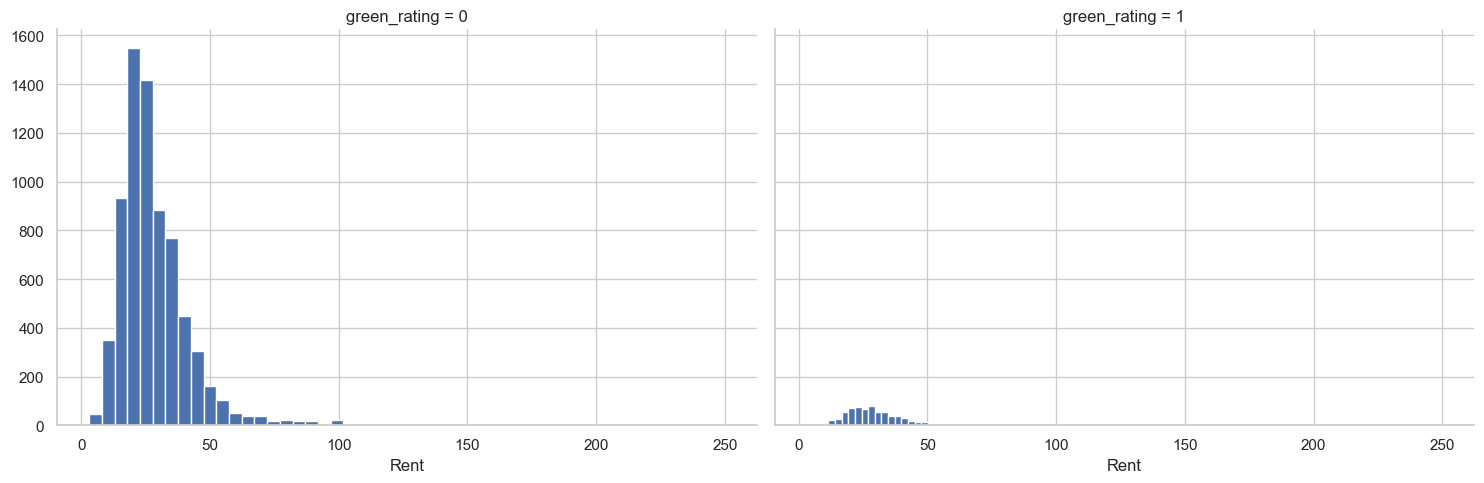

In [8]:
#distribution of rent
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col='green_rating', col_wrap=2, height=5, aspect=1.5)
g.map(plt.hist, 'Rent', bins=50)  # You can adjust the number of bins as per your preference
plt.show()

Here We can see that though the peak of the histogram is more or less at the at approximately the same rent value, we notice that the number of datapoints we have for non-green rated buildings is far lesser than the number of datapoints for green rated buildings. 

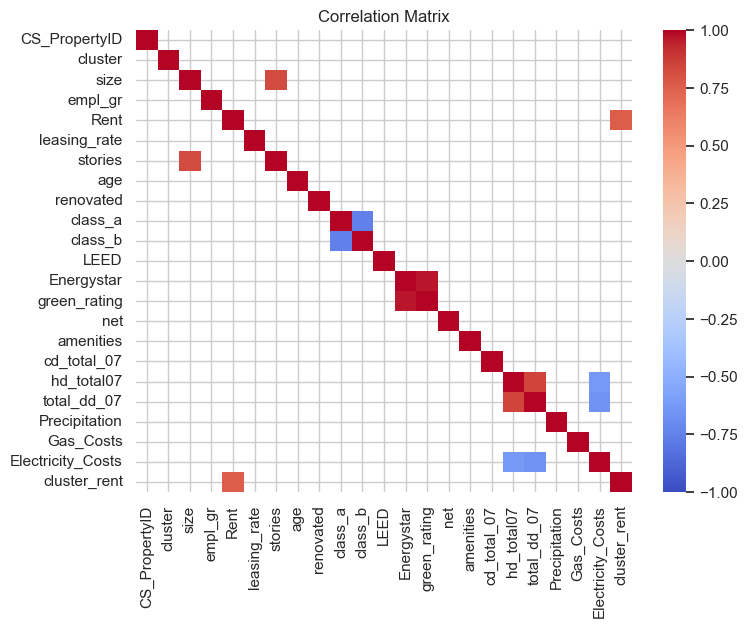

In [45]:
correlation_matrix = df.corr()
mask = (correlation_matrix > 0.6) | (correlation_matrix < -0.6)
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, mask=~mask)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix here shows that there is no significant linear relationship between rent and any other feature except cluster rent, which makes sense since the rent of a property directly influences the rent of the cluster it belongs to.

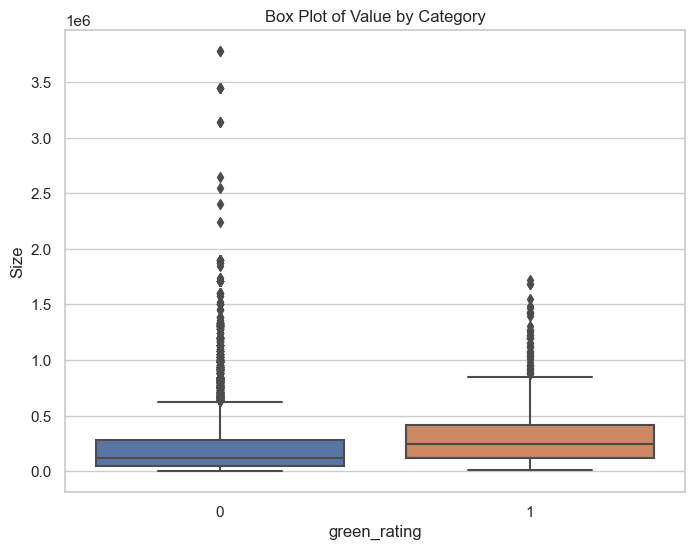

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['green_rating'], y=df['size'], data=df)
plt.xlabel('green_rating')
plt.ylabel('Size')
plt.title('Box Plot of Value by Category')
plt.show()

Here we can see that the green rated properties have a slightly bigger areas than the non green ones. This could be because its usually big corporations that are willing to invest in green properties and they usually require bigger units.

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


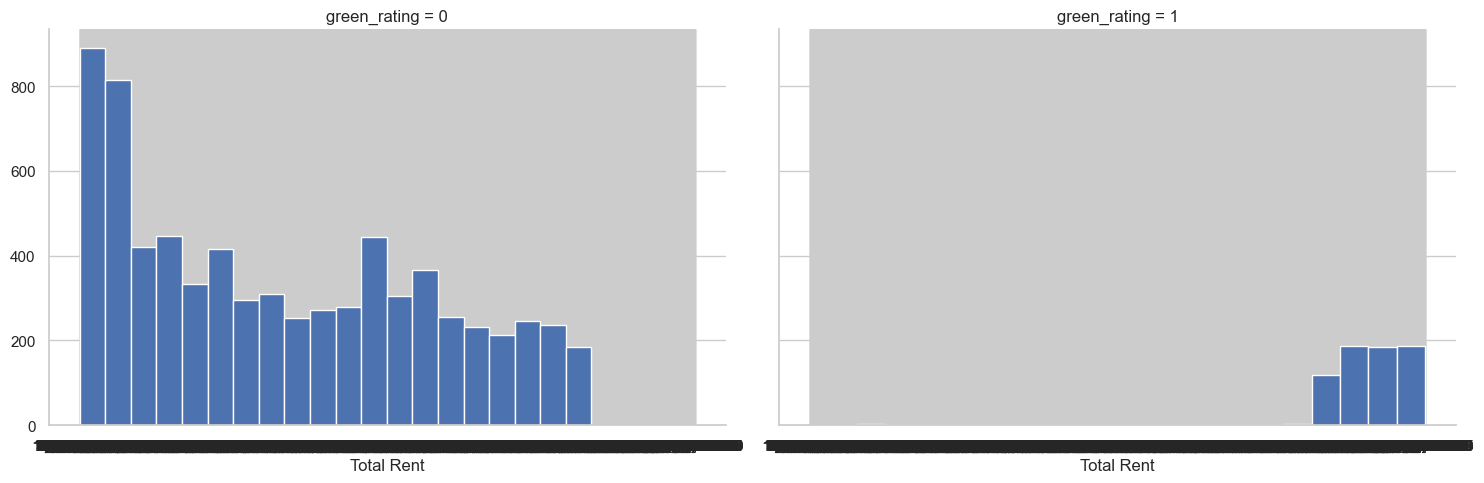

In [72]:
df['Total Rent']=df['Rent']*df['size']
def scientific_to_human(value):
    return "{:,.2f}".format(value)

df['Total Rent'] = df['Total Rent'].apply(scientific_to_human)
#distribution of rent
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col='green_rating', col_wrap=2, height=5, aspect=1.5)
g.map(plt.hist, 'Total Rent', bins=20)  # You can adjust the number of bins as per your preference
plt.show()


Here I have created a new variable to calculate the total rent that a given property earns by multiplying the size and the rent per square foot. We can see that green rated properties clearly earn a higher rent as opposed to the non-green properties and it does make sense to invest in them. 

In the analysis of whether investing in green-certified buildings is economically beneficial, several important observations have been made. Firstly, the number of properties with low occupancy rates is higher among non-green-rated apartments. Removing these low-occupancy properties might not be justified without understanding the underlying reasons. Moreover, the median rent values before and after such removal are similar, indicating the need for a more thorough examination of leasing rates.

Exploring further, it's evident that green-rated buildings generally exhibit higher occupancy rates, which could be attributed to their relatively new construction. However, age analysis reveals that older green buildings (60-120 years) tend to have higher occupancy rates compared to older non-green buildings. Additionally, the distribution of rent values shows a higher density of data points for green buildings.

Considering building size, green-rated properties tend to have slightly larger areas, often being preferred by larger corporations. Furthermore, a calculated metric combining size and rent confirms that green-rated buildings generate higher total rental earnings. These findings collectively support the conclusion that investing in green-certified buildings appears economically advantageous, potentially yielding higher long-term profits.